In [3]:
import osmnx as ox, matplotlib.pyplot as plt, numpy as np, geopandas as gpd
ox.config(use_cache=True, log_console=True)
%matplotlib inline

In [6]:
# get the network for all of LA - takes a couple minutes to do all the downloading and processing
place = 'Los Angeles, Los Angeles County, California, USA'
G = ox.graph_from_place(place, network_type='drive_service', simplify=False, retain_all=True)
# fig, ax = ox.plot_graph(G, node_size=0, edge_linewidth=0.1, save=True, filename='la'))
G_proj = ox.project_graph(G)

In [7]:
# clean up the intersections and extract their xy coords
intersections = ox.clean_intersections(G_proj, tolerance=15, dead_ends=False)
points = np.array([point.xy for point in intersections])

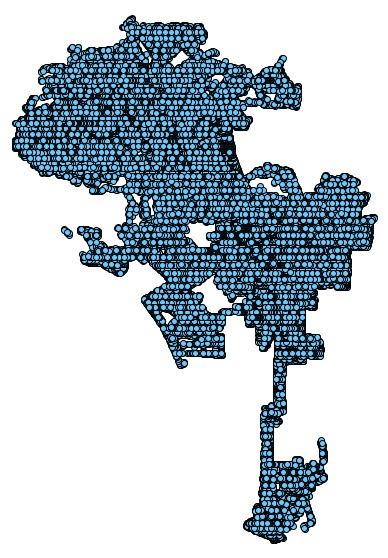

In [8]:
# plot the cleaned-up intersections
fig, ax = ox.plot_graph(G_proj, fig_height=10, show=False, close=False, node_alpha=0)
ax.scatter(x=points[:,0], y=points[:,1], zorder=2, color='#66ccff', edgecolors='k')
plt.show()

In [16]:
gdf = gpd.GeoDataFrame(geometry=intersections)
gdf.crs = G_proj.graph['crs']
ox.project_gdf(gdf, to_latlong=True)

,geometry
0,POINT (-122.2660242 37.85158239999998)
1,POINT (-122.2706403276567 37.85154308898613)
2,POINT (-122.2747358 37.8519964)
3,POINT (-122.2597445500057 37.85209395001472)
4,POINT (-122.2740522069728 37.8520866805581)
5,POINT (-122.2616563 37.85184469999999)
6,POINT (-122.2620253 37.85179759999999)
7,POINT (-122.262892 37.85168679999999)
8,POINT (-122.2602567500281 37.85214570000263)
9,POINT (-122.2608598 37.85194959999998)


<Figure size 487.209x600 with 1 Axes>